In [ ]:
import numpy as np
import matplotlib.pyplot as plt

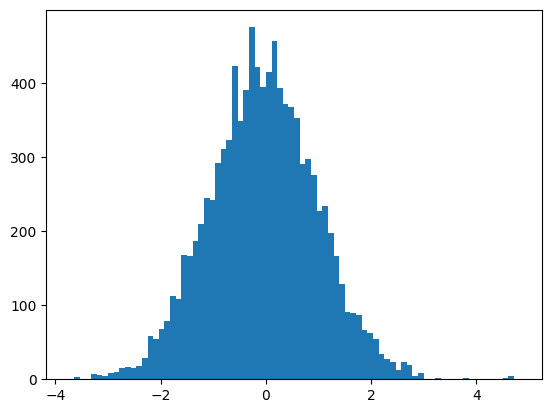

In [ ]:
# 예제 6.2.1: Gumbel 분포를 제안분포로, 정규분포를 목표분포로 한 M-H 알고리즘 구현.

# 목표 분포: 평균이 0이고 분산이 1인 정규분포
def p(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-x ** 2 / 2)

# 제안 분포: 위치 모수 m과 척도 모수 s를 가진 극한값 분포 (Gumbel 분포)
def q(x, m, s=0.5):
    return 1 / s * np.exp(-(x - m) / s) * np.exp(-np.exp(-(x - m) / s))

# 시뮬레이션 횟수 설정
T = 10000
# 초기값 설정
x = 5
s = 0.5  # Gumbel 분포의 척도 모수

xlist = []  # MCMC에서 생성된 샘플을 저장할 리스트

# MCMC 알고리즘 실행
for _ in range(T):
    # 제안 분포로부터 새로운 샘플 생성
    x_star = np.random.gumbel(loc=x, scale=s)

    # 메트로폴리스-헤이스팅스 알고리즘에 따른 승인 확률 계산
    a = min(1, p(x_star) * q(x, x_star) / (p(x) * q(x_star, x)))

    # 규칙에 따라 새로운 샘플을 수락 또는 기존 샘플을 유지
    if np.random.rand() < a:
        x = x_star

    # 샘플을 리스트에 추가
    xlist.append(x)

# 결과 시각화: MCMC에서 생성된 샘플의 히스토그램을 그림
plt.hist(xlist, bins=80, density=True)  # 밀도 히스토그램으로 그리기
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Metropolis-Hastings Algorithm')
plt.show()